In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.9, optimizer='adadelta', loss='mse', scale=1e9, early_stop=False, target_stop=4)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 39712.668
epoch  1 --- Loss --- 38039.066
epoch  2 --- Loss --- 36817.05
epoch  3 --- Loss --- 35809.016
epoch  4 --- Loss --- 34917.65
epoch  5 --- Loss --- 34094.785
epoch  6 --- Loss --- 33316.348
epoch  7 --- Loss --- 32569.844
epoch  8 --- Loss --- 31848.46
epoch  9 --- Loss --- 31148.338
epoch  10 --- Loss --- 30467.242
epoch  11 --- Loss --- 29803.867
epoch  12 --- Loss --- 29157.432
epoch  13 --- Loss --- 28527.455
epoch  14 --- Loss --- 27913.65
epoch  15 --- Loss --- 27315.81
epoch  16 --- Loss --- 26733.795
epoch  17 --- Loss --- 26167.477
epoch  18 --- Loss --- 25616.736
epoch  19 --- Loss --- 25081.453
epoch  20 --- Loss --- 24561.5
epoch  21 --- Loss --- 24056.73
epoch  22 --- Loss --- 23566.99
epoch  23 --- Loss --- 23092.107
epoch  24 --- Loss --- 22631.893
epoch  25 --- Loss --- 22186.148
epoch  26 --- Loss --- 21754.658
epoch  27 --- Loss --- 21337.201
epoch  28 --- Loss --- 20933.53
epoch  29 --- Loss --- 20543.396
epoch  30 --- Loss --- 20166.5

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 80.10475119749705 minutes


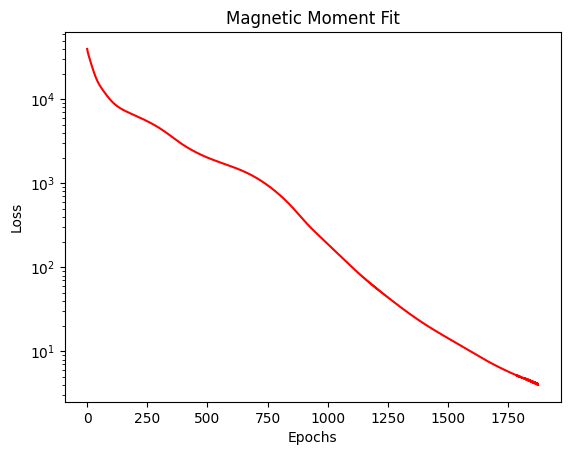

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[5.0585228e-01 7.5156009e-04 1.6118908e-04]]
Value:     [[ 0.9417453  -0.00670494  0.00466445]]
---- Moment  1 -----
Position:  [[ 0.0023961  -0.0232639   0.16173905]]
Value:     [[-0.01595184  0.14423232  2.7097578 ]]
---- Moment  2 -----
Position:  [[-0.01054298  0.26055244 -0.02274896]]
Value:     [[0.09279598 1.8234494  0.30302778]]
